<a href="https://colab.research.google.com/github/tuanky/DS-Unit-2-Applied-Modeling/blob/master/Tuan_Ky_Build_Week_2_project_assignment_applied_modeling_1%2B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict? ** Crash Descriptor**
- [ ] Is your problem regression or classification? Classification
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?** 4 classes**
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency > 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy? **The majority class, Property Damage, is  within 50-70%**
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

In [0]:


!pip install dask

In [2]:
import pandas as pd
import numpy as np
import dask.dataframe as dd
!pip install psutil requests

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
%%time
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    start_mem_gb = start_mem / 1024
    print(f'Memory usage of dataframe is {start_mem:.2f} MB',
          f'/ {start_mem_gb:.2f} GB')
    
    for col in df:
        col_type = str(df[col].dtypes)
        
        if col_type != 'object':
            c_min = df[col].min()
            c_max = df[col].max()
            if col_type[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                #if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                #    df[col] = df[col].astype(np.float16)
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    end_mem_gb = end_mem / 1024
    print(f'Memory usage after optimization is: {end_mem:.2f} MB',
          f'/ {end_mem_gb:.2f} GB')
    mem_dec = 100 * (start_mem - end_mem) / start_mem
    print(f'Decreased by {mem_dec:.1f}%')
    
    return df


def import_data(file):
    """create a dataframe and optimize its memory usage"""

    dtypes = {
        'AVProductStatesIdentifier': 'float64',
        'AVProductsEnabled': 'float64',
        'AVProductsInstalled': 'float64',
        'GeoNameIdentifier': 'float64',
        'IsProtected': 'float64',
        'PuaMode': 'object'
    }
    ddf = dd.read_csv(file, dtype=dtypes, parse_dates=True, keep_date_col=True)
    df = ddf.compute()
    df = reduce_mem_usage(df)
    return df

file = 'gdrive/My Drive/train.csv'
print('-' * 80)
print('train')
df = import_data(file)

--------------------------------------------------------------------------------
train
Memory usage of dataframe is 129.87 MB / 0.13 GB
Memory usage after optimization is: 31.46 MB / 0.03 GB
Decreased by 75.8%
CPU times: user 5.32 s, sys: 1.31 s, total: 6.64 s
Wall time: 15.5 s


In [5]:
print(df.shape)
df.head()

(895916, 18)


,Year,Crash Descriptor,Time,Date,Day of Week,Police Report,Lighting Conditions,Municipality,Collision Type Descriptor,County Name,Road Descriptor,Weather Conditions,Traffic Control Device,Road Surface Conditions,DOT Reference Marker Location,Pedestrian Bicyclist Action,Event Descriptor,Number of Vehicles Involved
0,2014,Injury Accident,5:35,6/18/2014,Wednesday,Y,Dawn,NEW YORK,OTHER,NEW YORK,Straight and Level,Clear,None,Dry,NaN,"Crossing, No Signal or Crosswalk","Pedestrian, Collision With",1
1,2014,Property Damage Accident,15:28,11/6/2014,Thursday,Y,Daylight,HENRIETTA,RIGHT ANGLE,MONROE,Straight and Level,Rain,None,Wet,NaN,Not Applicable,"Other Motor Vehicle, Collision With",2
2,2014,Property Damage Accident,15:27,3/19/2014,Wednesday,Y,Daylight,CICERO,OVERTAKING,ONONDAGA,Straight and Level,Cloudy,None,Dry,NaN,Not Applicable,"Other Motor Vehicle, Collision With",2
3,2014,Property Damage Accident,4:03,6/23/2014,Monday,Y,Dark-Road Unlighted,COLESVILLE,OTHER,BROOME,Straight and Grade,Clear,None,Dry,88I91011017,Not Applicable,Deer,1
4,2014,Property Damage Accident,15:28,9/27/2014,Saturday,Y,Daylight,HECTOR,OTHER,SCHUYLER,Straight and Level,Cloudy,None,Dry,79 63061019,Not Applicable,Deer,1


In [6]:
df.tail()

,Year,Crash Descriptor,Time,Date,Day of Week,Police Report,Lighting Conditions,Municipality,Collision Type Descriptor,County Name,Road Descriptor,Weather Conditions,Traffic Control Device,Road Surface Conditions,DOT Reference Marker Location,Pedestrian Bicyclist Action,Event Descriptor,Number of Vehicles Involved
224083,2016,Property Damage Accident,18:19,11/27/2016,Sunday,Y,Dark-Road Unlighted,LEICESTER,OTHER,LIVINGSTON,Straight and Level,Cloudy,None,Dry,36 42021185,Not Applicable,Deer,1
224084,2016,Property Damage Accident,16:57,4/27/2016,Wednesday,Y,Daylight,NIAGARA FALLS,OTHER,NIAGARA,Straight and Level,Clear,None,Dry,NaN,Not Applicable,"Fence, Collision With Fixed Object",1
224085,2016,Property Damage & Injury Accident,21:50,12/6/2016,Tuesday,Y,Dark-Road Unlighted,CANDOR,RIGHT ANGLE,TIOGA,Curve and Level,Snow,None,Snow/Ice,96 65011135,Not Applicable,"Other Motor Vehicle, Collision With",2
224086,2015,Property Damage Accident,19:30,9/19/2015,Saturday,Y,Dark-Road Lighted,NORTH HEMPSTEAD,REAR END,NASSAU,Straight and Level,Clear,None,Dry,NaN,Not Applicable,"Other Motor Vehicle, Collision With",2
224087,2016,Injury Accident,12:35,1/7/2016,Thursday,Y,Daylight,CANANDAIGUA,OTHER,ONTARIO,Straight and Level,Cloudy,No Passing Zone,Dry,NaN,Working in Roadway,"Pedestrian, Collision With",2


In [0]:
df.dtypes

Year                                int16
Crash Descriptor                 category
Time                             category
Date                             category
Day of Week                      category
Police Report                    category
Lighting Conditions              category
Municipality                     category
Collision Type Descriptor        category
County Name                      category
Road Descriptor                  category
Weather Conditions               category
Traffic Control Device           category
Road Surface Conditions          category
DOT Reference Marker Location    category
Pedestrian Bicyclist Action      category
Event Descriptor                 category
Number of Vehicles Involved          int8
dtype: object

In [9]:
train_condition = (df['Year'] < 2016)
train = df[train_condition]
test = df[~train_condition]
test.head()

,Year,Crash Descriptor,Time,Date,Day of Week,Police Report,Lighting Conditions,Municipality,Collision Type Descriptor,County Name,Road Descriptor,Weather Conditions,Traffic Control Device,Road Surface Conditions,DOT Reference Marker Location,Pedestrian Bicyclist Action,Event Descriptor,Number of Vehicles Involved
299452,2016,Property Damage & Injury Accident,10:38,5/15/2016,Sunday,Y,Daylight,OYSTER BAY COVE,HEAD ON,NASSAU,Curve and Level,Cloudy,None,Dry,NaN,Not Applicable,"Other Motor Vehicle, Collision With",2
299453,2016,Property Damage Accident,0:00,5/20/2016,Friday,N,Daylight,QUEENS,Unknown,QUEENS,Straight and Level,Clear,None,Dry,NaN,Not Applicable,"Other Motor Vehicle, Collision With",2
299454,2016,Injury Accident,19:29,8/15/2016,Monday,Y,Daylight,DEERFIELD,OTHER,ONEIDA,Straight and Level,Cloudy,None,Dry,926A26012004,Not Applicable,"Light Support/Utility Pole, Collision With Fix...",1
299457,2016,Property Damage Accident,12:55,3/30/2016,Wednesday,Y,Daylight,HUNTINGTON,OVERTAKING,SUFFOLK,Straight and Level,Clear,None,Dry,NaN,Not Applicable,"Other Motor Vehicle, Collision With",2
299459,2016,Property Damage Accident,20:10,7/9/2016,Saturday,Y,Dusk,TONAWANDA,OTHER,ERIE,Straight and Level,Rain,None,Wet,290I53011010,Not Applicable,"Guide Rail - Not At End, Collision With Fixed ...",1


In [10]:
test.isnull().sum()

Year                                  0
Crash Descriptor                      0
Time                                  0
Date                                  0
Day of Week                           0
Police Report                         0
Lighting Conditions                   0
Municipality                       3210
Collision Type Descriptor             0
County Name                           0
Road Descriptor                       0
Weather Conditions                    0
Traffic Control Device                0
Road Surface Conditions               0
DOT Reference Marker Location    197567
Pedestrian Bicyclist Action           0
Event Descriptor                      0
Number of Vehicles Involved           0
dtype: int64

In [0]:
#Choose your target. Which column in your tabular dataset will you predict? Crash Descriptor 
#link : https://catalog.data.gov/dataset/motor-vehicle-crashes-case-information-beginning-2009

#Cross Validation to model the data
target = 'Crash Descriptor'
features = train.drop(columns=target).columns.tolist()

# Arrange data into X features matrix and y target vector
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

In [12]:
#baseline
df['Crash Descriptor'].value_counts(normalize=True)

Property Damage Accident             0.600523
Injury Accident                      0.204620
Property Damage & Injury Accident    0.191531
Fatal Accident                       0.003326
Name: Crash Descriptor, dtype: float64

In [15]:
# 2.Choose what data to hold out for your test set
!pip install category_encoders
import category_encoders as ce
from scipy.stats import randint, uniform
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline

     |████████████████████████████████| 102kB 2.7MB/s 


In [24]:
%%time 
pipe = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100,
                           random_state=42,
                           n_jobs=1,
                           oob_score=True)
    )

params = {
    'randomforestclassifier__max_features': uniform(0, 1),
    'randomforestclassifier__min_samples_leaf': randint(1, 50),
    'randomforestclassifier__max_depth': [5, 10, 15, 20, None]
}

search = RandomizedSearchCV(
    pipe,
    param_distributions=params,
    n_iter=10,
    cv=4,
    scoring='accuracy',
    verbose=10,
    return_train_score=True,
    n_jobs=-1
)

pipe.fit(X_train, y_train);

CPU times: user 3min 3s, sys: 3.39 s, total: 3min 6s
Wall time: 3min 6s


In [25]:
print('Train Accuracy:', pipe.score(X_train, y_train))
print('Test Accuracy', pipe.score(X_test, y_test))

Train Accuracy: 0.9994747545487603
Test Accuracy 0.693231050518701


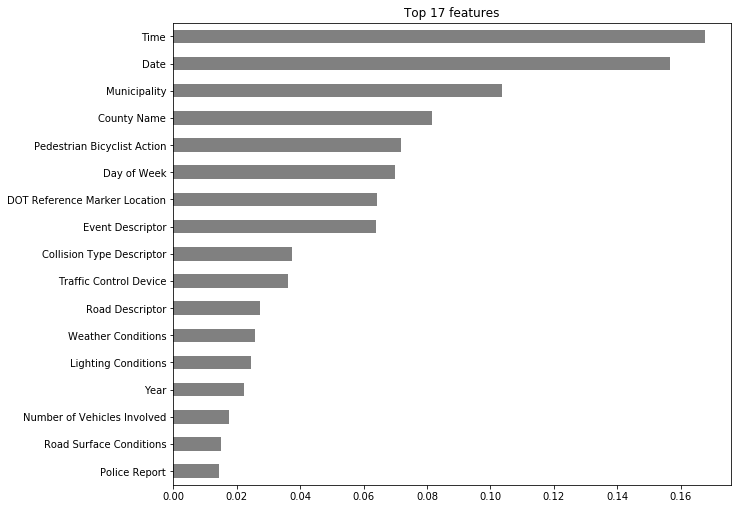

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

# Get the feature importances
rf = pipe.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot the feature importances
n = len(X_train.columns)
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [51]:
%%time 
from sklearn.impute import SimpleImputer
#drop-column imporance 
column  = 'Municipality'
# Fit without column
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='mean'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)
pipeline.fit(X_train.drop(columns=column), y_train)
score_without = pipeline.score(X_test.drop(columns=column), y_test)
print(f'Validation Accuracy without {column}: {score_without}')

# Fit with column
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='mean'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)
pipeline.fit(X_train, y_train)
score_with = pipeline.score(X_test, y_test)
print(f'Validation Accuracy with {column}: {score_with}')

# Compare the error with & without column
print(f'Drop-Column Importance for {column}: {score_with - score_without}')

Validation Accuracy without Municipality: 0.6824794308199849
Validation Accuracy with Municipality: 0.691223816526889
Drop-Column Importance for Municipality: 0.008744385706904167
CPU times: user 10min 27s, sys: 2.16 s, total: 10min 29s
Wall time: 2min 43s


In [30]:
%%time 
from sklearn.impute import SimpleImputer
#drop-column imporance 
column  = 'Police Report'
# Fit without column
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)
pipeline.fit(X_train.drop(columns=column), y_train)
score_without = pipeline.score(X_test.drop(columns=column), y_test)
print(f'Validation Accuracy without {column}: {score_without}')

# Fit with column
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)
pipeline.fit(X_train, y_train)
score_with = pipeline.score(X_test, y_test)
print(f'Validation Accuracy with {column}: {score_with}')

# Compare the error with & without column
print(f'Drop-Column Importance for {column}: {score_with - score_without}')

Validation Accuracy without Police Report: 0.6839202671012361
Validation Accuracy with Police Report: 0.693231050518701
Drop-Column Importance for Police Report: 0.00931078341746494
CPU times: user 10min 38s, sys: 3.1 s, total: 10min 41s
Wall time: 2min 49s


In [33]:
transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_test_transformed = transformers.transform(X_test)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [36]:
#use eli5 for PermutationImportance 
!pip install eli5

import eli5
from eli5.sklearn import PermutationImportance 

permuter = PermutationImportance(
    model,
    scoring = 'accuracy',
    n_iter = 5,
    random_state=42
)
permuter.fit(X_test_transformed, y_test)

     |████████████████████████████████| 112kB 3.5MB/s 


Using TensorFlow backend.


PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=100,
                                                     

In [38]:
feature_names = X_test.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=False)

Pedestrian Bicyclist Action      0.036585
County Name                      0.029128
Municipality                     0.028976
Police Report                    0.015588
Event Descriptor                 0.011504
DOT Reference Marker Location    0.009110
Number of Vehicles Involved      0.008004
Collision Type Descriptor        0.007513
Traffic Control Device           0.007510
Road Descriptor                  0.003059
Time                             0.002691
Weather Conditions               0.002387
Lighting Conditions              0.001616
Date                             0.000940
Road Surface Conditions          0.000784
Day of Week                      0.000487
Year                             0.000000
dtype: float64

In [40]:
feature_names = X_test.columns.tolist()

eli5.show_weights(
    permuter,
    top=None, #show permutation imprtances for all features
    feature_names=feature_names
)

Weight,Feature
0.0366 ± 0.0007,Pedestrian Bicyclist Action
0.0291 ± 0.0004,County Name
0.0290 ± 0.0008,Municipality
0.0156 ± 0.0001,Police Report
0.0115 ± 0.0006,Event Descriptor
0.0091 ± 0.0009,DOT Reference Marker Location
0.0080 ± 0.0006,Number of Vehicles Involved
0.0075 ± 0.0004,Collision Type Descriptor
0.0075 ± 0.0007,Traffic Control Device
0.0031 ± 0.0003,Road Descriptor


In [45]:
print('Shape before removing features:', X_train.shape)

Shape before removing features: (594008, 16)


In [61]:
X_test = X_test[features]

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=118, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_test, y_test))

Validation Accuracy 0.6912072551903229


**Use xgboost for gradient boosting**





In [62]:
from xgboost import XGBClassifier

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBClassifier(n_estimators=118, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Time', 'Date', 'Day of Week',
                                      'Police Report', 'Lighting Conditions',
                                      'Municipality',
                                      'Collision Type Descriptor',
                                      'County Name', 'Road Descriptor',
                                      'Weather Conditions',
                                      'Traffic Control Device',
                                      'Road Surface Conditions',
                                      'DOT Reference Marker Location',
                                      'Pedestrian Bicyclist Action',
                                      'Event Descriptor'],
                                drop_in...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               cols

In [63]:
from sklearn.metrics import accuracy_score
y_pred = pipeline.predict(X_test)
print('Test Accuracy', accuracy_score(y_test, y_pred))

Test Accuracy 0.695251533579766


In [57]:
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

model = XGBClassifier(
    n_estimators=1000, # <= 1000 trees, depends on early stopping
    max_depth=5,       # try deeper trees because of high cardinality categoricals
    learning_rate=0.5, # try higher learning rate
    n_jobs=-1
)

eval_set = [(X_train_encoded, y_train), 
            (X_test_encoded, y_test)]

model.fit(X_train_encoded, y_train, 
          eval_set=eval_set, 
          eval_metric='merror', 
          early_stopping_rounds=50)

[0]	validation_0-merror:0.328169	validation_1-merror:0.34013
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 50 rounds.
[1]	validation_0-merror:0.32725	validation_1-merror:0.338964
[2]	validation_0-merror:0.328586	validation_1-merror:0.340488
[3]	validation_0-merror:0.316075	validation_1-merror:0.326305
[4]	validation_0-merror:0.312849	validation_1-merror:0.322171
[5]	validation_0-merror:0.307353	validation_1-merror:0.315715
[6]	validation_0-merror:0.306152	validation_1-merror:0.31451
[7]	validation_0-merror:0.303897	validation_1-merror:0.311992
[8]	validation_0-merror:0.303107	validation_1-merror:0.310916
[9]	validation_0-merror:0.30136	validation_1-merror:0.309061
[10]	validation_0-merror:0.297169	validation_1-merror:0.303606
[11]	validation_0-merror:0.29626	validation_1-merror:0.30189
[12]	validation_0-merror:0.295504	validation_1-merror:0.300896
[13]	validation_0-merror:0.294876	

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

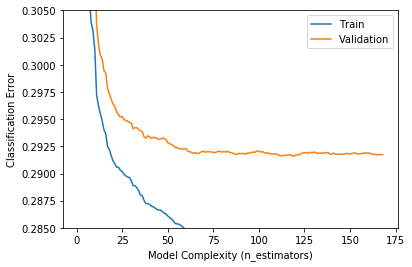

In [60]:
#store into list
results = model.evals_result() 

#adding the index list into variable

train_error = results['validation_0']['merror'] 
val_error = results['validation_1']['merror']
epoch = range(1, len(train_error)+1) #domain for n_estimators

#plotting 
plt.plot(epoch, train_error, label='Train')
plt.plot(epoch, val_error, label='Validation')
plt.ylabel('Classification Error')
plt.xlabel('Model Complexity (n_estimators)')
plt.ylim((0.285, 0.305)) # Zoom in
plt.legend();